## Import data and preprocessing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Hyperparameter tuning

In [7]:
import keras_tuner as kt

In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [9]:
def build_model(hp):

    model = Sequential()

    ## hidden layer
    model.add(Dense(units=128, activation='relu', input_dim=8))

    ## output layer
    model.add(Dense(units=1, activation='sigmoid'))

    ## Compile the model
    all_optimizers = hp.Choice('optimizer', values=['Adadelta', 'Adafactor', 'Adagrad', 'Adam', 'AdamW', 'Adamax', 'Ftrl', 'Lion', 'LossScaleOptimizer', 'Nadam', 'RMSprop'])
    model.compile(loss='binary_crossentropy', optimizer=all_optimizers, metrics=['accuracy'])

    return model

In [10]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=10,
                        directory='optimizer_tuning')

c:\Users\7200\AppData\Local\anaconda3\envs\tf\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
tuner.search(X, y, epochs=10, validation_data=(X_test, y_test))

Trial 10 Complete [00h 00m 02s]
val_accuracy: 0.7792207598686218

Best val_accuracy So Far: 0.8246753215789795
Total elapsed time: 00h 00m 21s


In [12]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'Lion'}

In [13]:
model= tuner.get_best_models(num_models=1)[0]
model.name = 'tuned_model'
model.summary()

c:\Users\7200\AppData\Local\anaconda3\envs\tf\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\7200\AppData\Local\anaconda3\envs\tf\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'lion', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "tuned_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

## Train the best model

In [15]:
history = model.fit(X, y, epochs=100, validation_data=(X_test, y_test), initial_epoch=10)
history = history.history

Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7587 - loss: 0.4895 - val_accuracy: 0.8117 - val_loss: 0.4210
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7610 - loss: 0.4604 - val_accuracy: 0.7857 - val_loss: 0.4269
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7876 - loss: 0.4457 - val_accuracy: 0.7727 - val_loss: 0.4350
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8061 - loss: 0.4161 - val_accuracy: 0.7597 - val_loss: 0.4395
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7829 - loss: 0.4584 - val_accuracy: 0.7727 - val_loss: 0.4390
Epoch 16/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8053 - loss: 0.4418 - val_accuracy: 0.7597 - val_loss: 0.4362
Epoch 17/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7918 - loss: 0.4367 - val_accuracy: 0.7857 - val_loss: 0.4322
Epoch 18/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7997 - loss: 0.4343 - val_accuracy: 0.

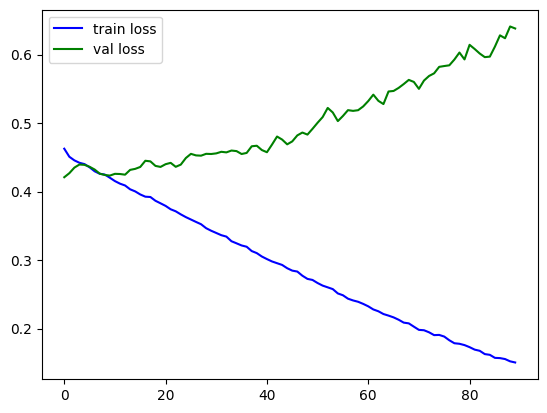

In [16]:
plt.plot(history['loss'], label='train loss', color='blue')
plt.plot(history['val_loss'], label='val loss', color='green')
plt.legend()
plt.show()

In [17]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [21]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7532467532467533

## CHeck on train set

In [24]:
y_pred_x = model.predict(X)
y_pred_x = np.where(y_pred_x >= 0.5, 1, 0)
accuracy_score(y, y_pred_x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


0.9657980456026058